In [1]:
import numpy as np
import pandas as pd
import torch 

seed=1
np.random.seed(seed)
torch.manual_seed(seed)

In [2]:
df = pd.read_csv('./dataset/train.csv')
df

,ID,n0,n1,n2,n3,n4,n5,n6,n7,n8,...,n4087,n4088,n4089,n4090,n4091,n4092,n4093,n4094,n4095,category
0,0,0.000000,0.000000,1.272801,0.290501,0.581446,0.000000,0.000000,0,0.000000,...,1.645888,0.869640,0.302432,0.953719,0.022545,0.498048,0.000000,0.034988,0.692382,Orange_Ripe
1,1,0.000000,0.000000,1.542096,0.000000,0.896557,0.049978,0.000000,0,0.117847,...,1.504220,0.622686,0.588427,0.524415,0.305426,0.386204,0.000000,0.000000,0.668196,Banana_Ripe
2,2,0.000000,0.000000,1.098595,0.571866,0.500355,0.000000,0.000000,0,0.493137,...,1.169341,0.913239,0.064404,0.531270,0.000000,0.471604,0.000000,0.000000,0.658250,Mango_Raw
3,3,0.000000,0.101666,1.159194,0.599216,0.893206,0.000000,0.200139,0,0.645675,...,0.560686,1.243676,0.432523,0.701881,0.000000,0.589985,0.000000,0.000000,0.591165,Leeche_Raw
4,4,0.000000,0.000000,1.178603,0.362568,0.577602,0.000000,0.000000,0,0.079862,...,1.206032,0.736831,0.345906,0.878515,0.119000,0.261441,0.000000,0.000000,0.458905,Mango_Ripe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,1211,0.000000,0.364963,0.770978,0.570945,0.996824,0.066661,0.000000,0,0.727390,...,0.317000,0.844568,0.084291,0.399840,0.225693,0.214918,0.000000,0.000000,0.356400,Strawberry_Ripe
1212,1212,0.083656,0.111407,1.753287,0.000000,1.197256,0.117919,0.000000,0,0.000000,...,1.114398,0.659943,0.000000,0.457870,0.405808,0.000000,0.342428,0.000000,0.019390,Banana_Ripe
1213,1213,0.000000,0.000000,1.545725,0.000000,0.842485,0.000000,0.000000,0,0.087607,...,1.490054,0.883849,0.589065,0.644103,0.194427,0.426330,0.000000,0.000000,0.764020,Banana_Ripe
1214,1214,0.000000,0.000000,1.194037,0.969926,0.499340,0.055789,0.000000,0,0.221447,...,0.987144,0.645109,0.113367,0.877268,0.000000,0.175457,0.000000,0.000000,0.367878,Guava_Ripe


In [3]:
X_df, Y_df = df.iloc[:,1:-1], df.iloc[:,-1]

from fastai.tabular.all import *
dep_var = 'category'

continuous_vars, categorical_vars = cont_cat_split(X_df, dep_var=dep_var)
waste_cont_features = np.array(continuous_vars)[X_df.loc[:,continuous_vars].nunique() == 1]
waste_cat_features = np.array(categorical_vars)[X_df.loc[:,categorical_vars].nunique() == 1]

# No waste cont features
X_df = X_df.drop(waste_cat_features, axis=1)

/Users/kartiksinghal/opt/anaconda3/envs/pytorch/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
len(waste_cat_features)

475

In [5]:
X, Y = X_df.to_numpy(), Y_df.to_numpy()

In [6]:
"""
Convert string classes to integer labels
"""

classes = np.unique(Y)
class_to_idx = {classes[i]: i for i in range(len(classes))}
idx_to_class = {class_to_idx[cl]: cl for cl in class_to_idx.keys()}
Y = np.array([class_to_idx[y] for y in Y])

Finished Training


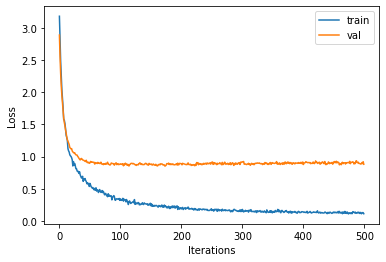

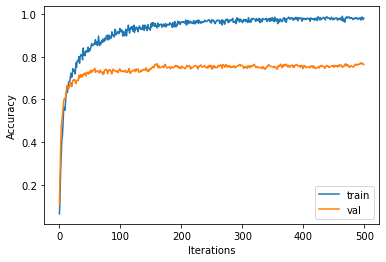

tensor(0.9802) tensor(0.7635)
Finished Training


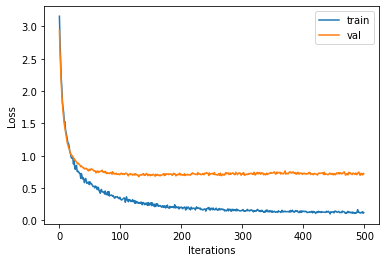

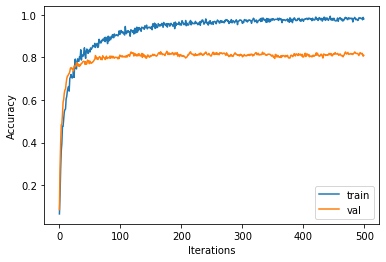

tensor(0.9802) tensor(0.8094)
Finished Training


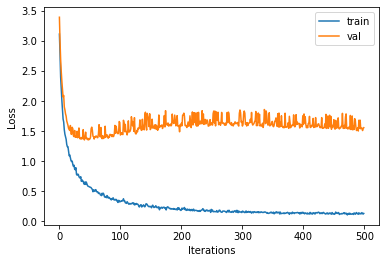

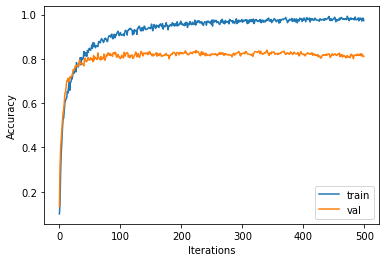

tensor(0.9729) tensor(0.8114)
Finished Training


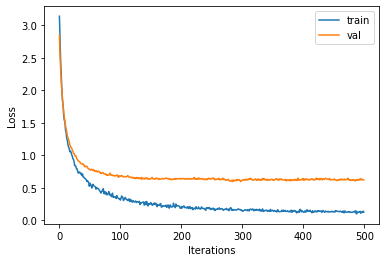

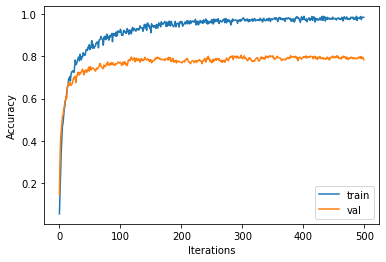

tensor(0.9833) tensor(0.7830)
Finished Training


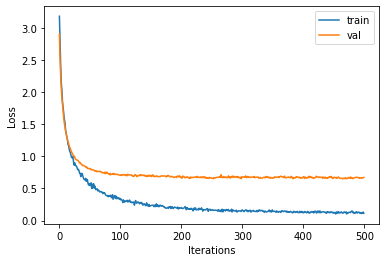

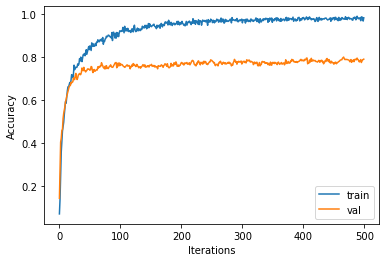

tensor(0.9844) tensor(0.7918)
K-fold accuracy:  tensor(0.7918)


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
k_fold_acc = 0
for i, (train_index, val_index) in enumerate(kf.split(X)):

    X_train, X_val, Y_train, Y_val= X[train_index], X[val_index], Y[train_index], Y[val_index]
    """
    Standardising the train data
    """

    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    """
    Outlier detection
    """
    from sklearn.neighbors import LocalOutlierFactor

    clf = LocalOutlierFactor(n_neighbors=10)
    inlier_pred_labels = clf.fit_predict(X_train)
    X_train = X_train[inlier_pred_labels == 1]
    Y_train = Y_train[inlier_pred_labels == 1]
    
    """
    Feature engineering
    """

    from sklearn.decomposition import PCA
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

    pca = PCA(n_components=600)
    pca.fit(X_train)
    X_train = pca.transform(X_train)
    
    from sklearn.neighbors import KNeighborsClassifier 

    neigh = KNeighborsClassifier(n_neighbors=10)
    neigh.fit(X_train, Y_train)
    labels = neigh.predict(X_train)

    onehot_encoded_array = np.zeros((labels.size, len(classes)), dtype=int)
    onehot_encoded_array[np.arange(labels.size), labels] = 1 

    X_train = np.c_[X_train, onehot_encoded_array] 
    X_val = scaler.transform(X_val)
    X_val = pca.transform(X_val)

    labels = neigh.predict(X_val)
    onehot_encoded_array = np.zeros((labels.size, len(classes)), dtype=int)
    onehot_encoded_array[np.arange(labels.size),labels] = 1 

    X_val = np.c_[X_val, onehot_encoded_array]
    from torch.utils.data import Dataset, DataLoader

    class FruitDataset(Dataset):
        def __init__(self, X, Y):
            self.X = X
            self.Y = Y

        def __len__(self):
            return len(self.Y)

        def __getitem__(self, idx):
            return self.X[idx].astype(np.float32), self.Y[idx]

    train_dataset = FruitDataset(X_train, Y_train)
    val_dataset = FruitDataset(X_val, Y_val)
    train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=True)
    import torch.nn as nn
    import torch.nn.functional as F

    class Network(nn.Module):
        def __init__(self):
            super().__init__()
            self.fc1 = nn.Linear(600+20, 64)
            self.fc2 = nn.Linear(64, 20)
            self.dropout1 = nn.Dropout(0.5)

        def forward(self, x):
            x = self.dropout1(F.relu(self.fc1(x)))
            x = self.fc2(x)
            return x

    net = Network()
    import torch.optim as optim

    class_sizes = torch.tensor(np.unique(Y_train, return_counts=True)[1])
    criterion = nn.CrossEntropyLoss(weight=1/class_sizes)
    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-2)
    from tqdm import tqdm
    import torch 

    history = {
        "train_loss": [],
        "train_acc": [],
        "val_loss": [],
        "val_acc": [],
    }

    for epoch in range(500):  # loop over the dataset multiple times

        train_loss = 0.0
        train_acc = 0
        for i, (inputs, labels) in enumerate(train_dataloader):
            net.train()
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            train_loss += loss.item()

            pred_labels = torch.argmax(outputs, dim=1)
            train_acc += (pred_labels == labels).sum() / len(labels)


        # val loss
        val_loss = 0
        val_acc = 0
        for i, (inputs, labels) in enumerate(val_dataloader):
            net.eval()
            # forward
            outputs = net(inputs)
            val_loss += criterion(outputs, labels).item()

            pred_labels = torch.argmax(outputs, dim=1)
            val_acc += (pred_labels == labels).sum() / len(labels)

        history["train_loss"].append(train_loss / len(train_dataloader))
        history["train_acc"].append(train_acc / len(train_dataloader))
        history["val_loss"].append(val_loss / len(val_dataloader))
        history["val_acc"].append(val_acc / len(val_dataloader))

    print('Finished Training')    
    import matplotlib.pyplot as plt

    plt.plot(np.arange(len(history["train_loss"])), history["train_loss"], label="train")
    plt.plot(np.arange(len(history["val_loss"])), history["val_loss"], label="val")
    plt.legend()
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.plot()
    plt.show()

    plt.plot(np.arange(len(history["train_acc"])), history["train_acc"], label="train")
    plt.plot(np.arange(len(history["val_acc"])), history["val_acc"], label="val")
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.plot()
    plt.show()

    k_fold_acc += history["val_acc"][-1]
    print(history["train_acc"][-1], history["val_acc"][-1])

print("K-fold accuracy: ", k_fold_acc/5)


TEST SUBMISSION

In [8]:
test_df = pd.read_csv('./dataset/test.csv')
test_df

,ID,n0,n1,n2,n3,n4,n5,n6,n7,n8,...,n4086,n4087,n4088,n4089,n4090,n4091,n4092,n4093,n4094,n4095
0,0,0.0,0.000000,0.908889,0.251257,0.662262,0.042495,0.000000,0,0.964784,...,0.694072,1.146161,1.483842,0.717836,0.472616,0.000000,0.488022,0.0,0.0,0.655670
1,1,0.0,0.000000,1.191055,0.407350,0.441898,0.000000,0.334858,0,0.295357,...,0.273436,1.466932,0.940850,0.470344,1.032085,0.000000,0.654070,0.0,0.0,0.614493
2,2,0.0,0.261903,0.992782,0.301102,0.636006,0.009558,0.009448,0,0.974949,...,0.000000,0.769983,0.834360,0.369656,1.000858,0.431571,0.361993,0.0,0.0,0.392158
3,3,0.0,0.000000,1.352401,0.346003,0.401412,0.000000,0.000000,0,0.450667,...,0.339935,1.325595,0.981124,0.486731,0.747392,0.000000,0.300671,0.0,0.0,0.628365
4,4,0.0,0.000000,1.114281,0.696140,0.121505,0.000000,0.000000,0,0.591384,...,0.093661,0.875113,0.360689,0.659230,0.546044,0.000000,0.427255,0.0,0.0,0.835671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,410,0.0,0.000000,1.066927,0.495523,0.020179,0.010377,0.000000,0,0.190290,...,0.182461,2.003547,0.602592,0.296488,0.673558,0.000000,0.287565,0.0,0.0,0.595830
411,411,0.0,0.000000,1.044428,0.630166,0.214812,0.000000,0.297711,0,0.992859,...,0.000000,0.836084,1.055142,0.272300,1.213401,0.106611,0.494905,0.0,0.0,0.321924
412,412,0.0,0.000000,1.524889,0.000000,0.791997,0.000000,0.000000,0,0.070156,...,0.269538,1.565473,0.857422,0.642805,0.870113,0.134546,0.150362,0.0,0.0,0.724412
413,413,0.0,0.000000,1.066159,0.809718,0.601291,0.000000,0.000000,0,0.728140,...,0.407508,0.740154,0.947700,0.000000,0.625964,0.000000,0.013839,0.0,0.0,0.367881


In [9]:
ids, Xtest_df = test_df.iloc[:,0], test_df.iloc[:,1:]
Xtest_df = Xtest_df.drop(waste_cat_features, axis=1)
X_test = Xtest_df.to_numpy()

In [10]:
X_test = scaler.transform(X_test)
X_test = pca.transform(X_test)

labels = neigh.predict(X_test)
onehot_encoded_array = np.zeros((labels.size, len(classes)), dtype=int)
onehot_encoded_array[np.arange(labels.size),labels] = 1 

X_test = np.c_[X_test, onehot_encoded_array]

In [11]:
net.eval()
outputs = net(torch.tensor(X_test, dtype=torch.float32))
pred_labels = torch.argmax(outputs, dim=1)
string_labels = [idx_to_class[label.item()] for label in pred_labels]

In [12]:
output_data = {'ID': ids,
        'Category': string_labels}

In [13]:
output_df = pd.DataFrame(output_data)
output_df

,ID,Category
0,0,Leeche_Raw
1,1,Orange_Raw
2,2,Pomengranate_Ripe
3,3,Strawberry_Raw
4,4,Orange_Ripe
...,...,...
410,410,Orange_Ripe
411,411,Pomengranate_Ripe
412,412,Banana_Ripe
413,413,Mango_Raw


In [14]:
output_df.to_csv('file2.csv', index=False)